In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df=pd.read_csv('indices.csv')
df.head()

,time,y,x,spatial_ref_x,ci,spatial_ref_y,savi,spatial_ref_x.1,evi,spatial_ref_y.1,ndvi,spatial_ref_x.2,msi,spatial_ref_y.2,mvi
0,2022-08-23 05:14:41.977841,1998015.0,7794825.0,6933,0.224017,6933,0.571297,6933,2.298732,6933,0.474097,6933,0.281250,6933,0.474097
1,2022-08-23 05:14:41.977841,1998015.0,7794855.0,6933,0.232160,6933,0.597308,6933,2.690802,6933,0.490514,6933,0.291555,6933,0.490514
2,2022-08-23 05:14:41.977841,1998015.0,7794885.0,6933,0.225314,6933,0.567747,6933,2.532115,6933,0.470816,6933,0.272595,6933,0.470816
3,2022-08-23 05:14:41.977841,1998015.0,7794915.0,6933,0.230543,6933,0.587555,6933,2.547578,6933,0.484455,6933,0.289696,6933,0.484455
4,2022-08-23 05:14:41.977841,1998015.0,7794945.0,6933,0.233138,6933,0.612420,6933,2.398518,6933,0.497598,6933,0.302786,6933,0.497598


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969717 entries, 0 to 969716
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             969717 non-null  object 
 1   y                969717 non-null  float64
 2   x                969717 non-null  float64
 3   spatial_ref_x    969717 non-null  int64  
 4   ci               969717 non-null  float64
 5   spatial_ref_y    969717 non-null  int64  
 6   savi             969717 non-null  float64
 7   spatial_ref_x.1  969717 non-null  int64  
 8   evi              969717 non-null  float64
 9   spatial_ref_y.1  969717 non-null  int64  
 10  ndvi             969717 non-null  float64
 11  spatial_ref_x.2  969717 non-null  int64  
 12  msi              969717 non-null  float64
 13  spatial_ref_y.2  969717 non-null  int64  
 14  mvi              969717 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 111.0+ MB


In [3]:
df['time'].unique()

array(['2022-08-23 05:14:41.977841', '2023-02-09 05:14:28.128791',
       '2023-04-10 05:14:29.482655'], dtype=object)

In [4]:
# df['time'].replace(['2022-08-23 05:14:41.977841', '2023-02-09 05:14:28.128791',
#                     '2023-04-10 05:14:29.482655'],[20220823,20230209,20230410],inplace=True)

df['time'] = df['time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())

In [5]:
df.isnull().sum()


time               0
y                  0
x                  0
spatial_ref_x      0
ci                 0
spatial_ref_y      0
savi               0
spatial_ref_x.1    0
evi                0
spatial_ref_y.1    0
ndvi               0
spatial_ref_x.2    0
msi                0
spatial_ref_y.2    0
mvi                0
dtype: int64

In [6]:
df['savi'].fillna(df['savi'].mean(),inplace=True)
df['evi'].fillna(df['evi'].median(),inplace=True)
df['ndvi'].fillna(df['ndvi'].mean(),inplace=True)
df['mvi'].fillna(df['mvi'].median(),inplace=True)
df['mvi'][np.isinf(df['mvi'])]=999

In [7]:
df.isnull().sum()

time               0
y                  0
x                  0
spatial_ref_x      0
ci                 0
spatial_ref_y      0
savi               0
spatial_ref_x.1    0
evi                0
spatial_ref_y.1    0
ndvi               0
spatial_ref_x.2    0
msi                0
spatial_ref_y.2    0
mvi                0
dtype: int64

In [8]:
def outliersTreatment(df1, attr):
    percentile25 = df1[attr].quantile(0.25)
    percentile75 = df1[attr].quantile(0.75)
    iqr = percentile75 - percentile25
    print(percentile25)
    print(percentile75)
    print(iqr)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df1[df1[attr] > upper_limit]
    df1[df1[attr] < lower_limit]
    df1 = df1[(df1[attr] <= upper_limit) & (df1[attr] >= lower_limit)]
    plt.figure(figsize=(16, 5))
    sns.boxplot(df1[attr])
    plt.show()
    global df
    df = df1

-0.048492018
0.4338039
0.48229591800000005


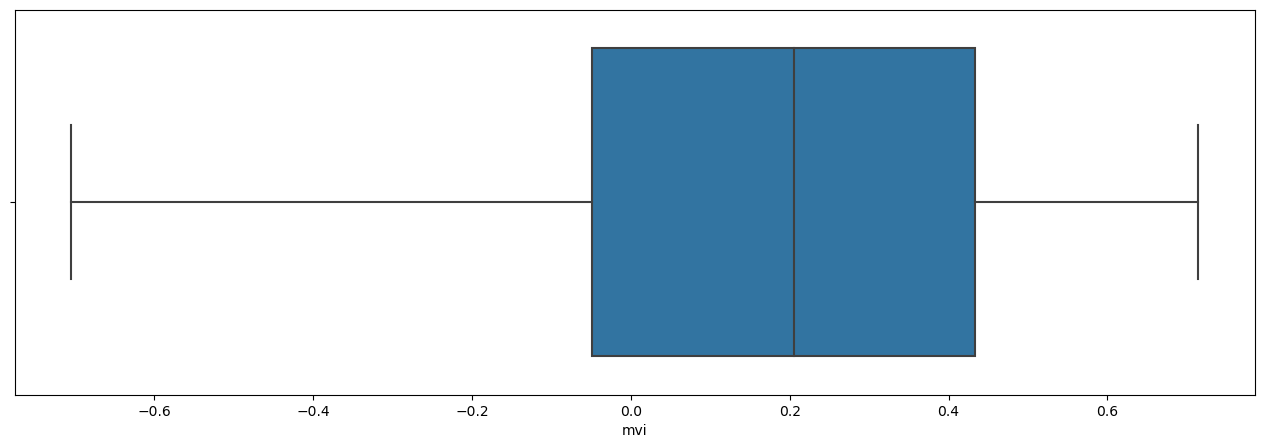

In [9]:
outliersTreatment(df, 'mvi')

In [10]:
print(pd.__version__)

2.0.2


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

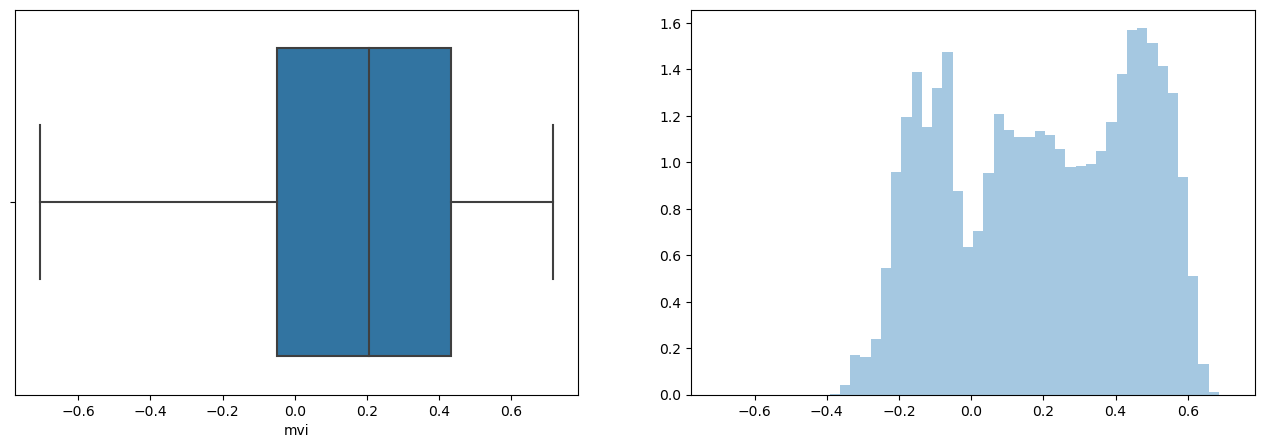

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['mvi'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['mvi'])

In [12]:
df.corr()

,time,y,x,spatial_ref_x,ci,spatial_ref_y,savi,spatial_ref_x.1,evi,spatial_ref_y.1,ndvi,spatial_ref_x.2,msi,spatial_ref_y.2,mvi
time,1.000000e+00,6.088250e-12,-2.041431e-14,NaN,0.282272,NaN,0.036713,NaN,-0.002200,NaN,0.023269,NaN,0.316682,NaN,0.023269
y,6.088250e-12,1.000000e+00,-5.037083e-12,NaN,-0.048413,NaN,0.044578,NaN,-0.004060,NaN,0.018530,NaN,0.015755,NaN,0.018530
x,-2.041431e-14,-5.037083e-12,1.000000e+00,NaN,0.021502,NaN,-0.044303,NaN,0.002603,NaN,-0.028358,NaN,-0.013348,NaN,-0.028358
spatial_ref_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,2.822721e-01,-4.841336e-02,2.150209e-02,NaN,1.000000,NaN,-0.678531,NaN,-0.004572,NaN,-0.605907,NaN,0.581182,NaN,-0.605907
spatial_ref_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
savi,3.671295e-02,4.457838e-02,-4.430321e-02,NaN,-0.678531,NaN,1.000000,NaN,0.018482,NaN,0.979932,NaN,-0.542878,NaN,0.979932
spatial_ref_x.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
evi,-2.199753e-03,-4.060477e-03,2.602796e-03,NaN,-0.004572,NaN,0.018482,NaN,1.000000,NaN,0.021990,NaN,-0.007133,NaN,0.021990
spatial_ref_y.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

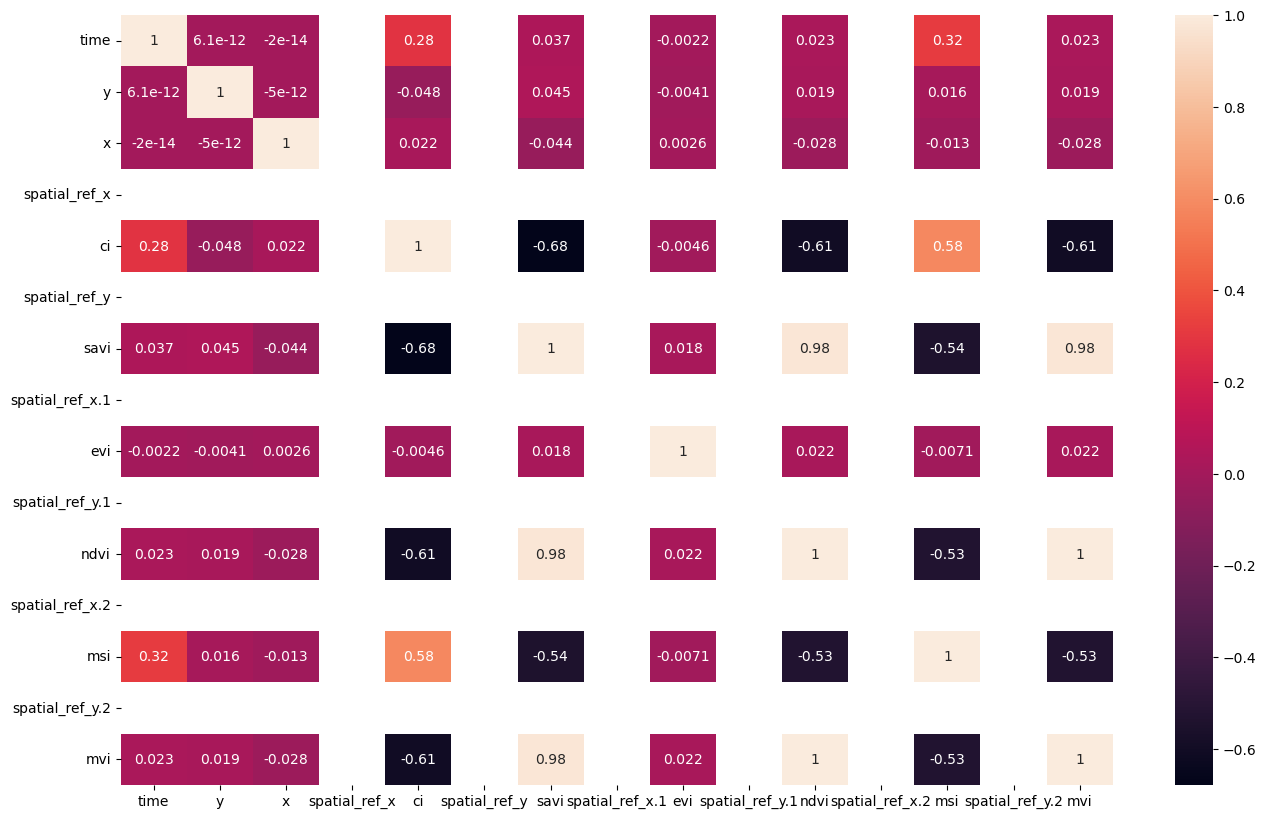

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)

In [14]:
dfc=df.corr()
dfc["mvi"].sort_values(ascending=False)

ndvi               1.000000
mvi                1.000000
savi               0.979932
time               0.023269
evi                0.021990
y                  0.018530
x                 -0.028358
msi               -0.532535
ci                -0.605907
spatial_ref_x           NaN
spatial_ref_y           NaN
spatial_ref_x.1         NaN
spatial_ref_y.1         NaN
spatial_ref_x.2         NaN
spatial_ref_y.2         NaN
Name: mvi, dtype: float64

In [15]:
x=df[["savi","ci","msi","y","x","time"]]

In [16]:
x.shape

(969717, 6)

In [17]:
y=df["mvi"]

In [18]:
y.shape

(969717,)

In [19]:
y=df.mvi.values.reshape(-1,1)

In [20]:
y.shape

(969717, 1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((775773, 6), (775773, 1), (193944, 6), (193944, 1))

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=lm.predict(x_test)
y_pred

array([[ 0.26719239],
       [ 0.33740804],
       [-0.2119612 ],
       ...,
       [ 0.28158342],
       [ 0.19097087],
       [ 0.30501959]])

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.03586107908564744, 0.04452286747517828)

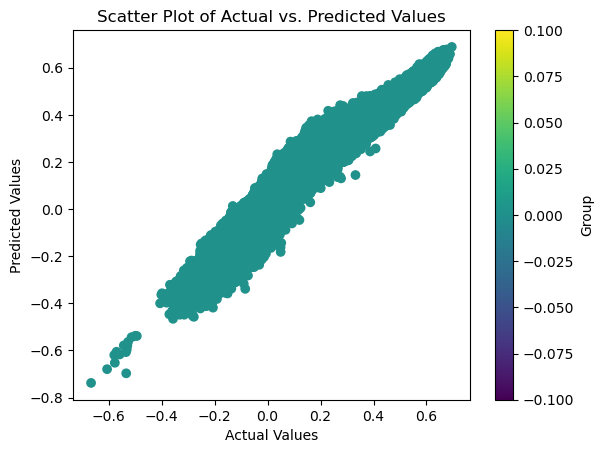

In [25]:
# plt.scatter(x,y)

# Define the condition or criterion for assigning groups
condition = np.abs(y_test - y_pred) > 1.0  # Example condition: absolute difference > 1.0

# Define the groups based on the condition
groups = np.where(condition, 1, 0)  # Assign 1 to True condition, 0 to False condition

# Plot the scatter plot with different colors based on groups
plt.scatter(y_test, y_pred, c=groups)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.colorbar(label='Group')
plt.show()

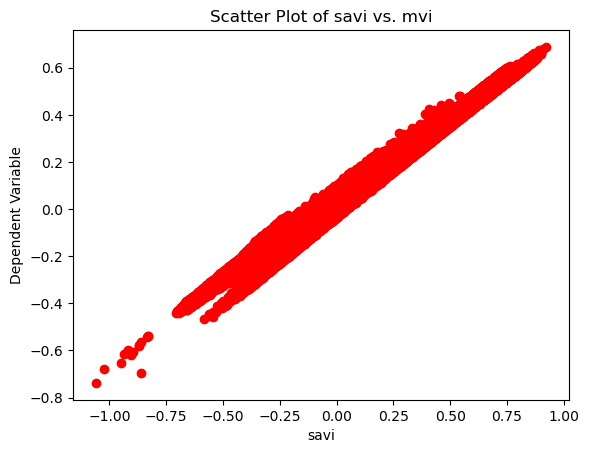

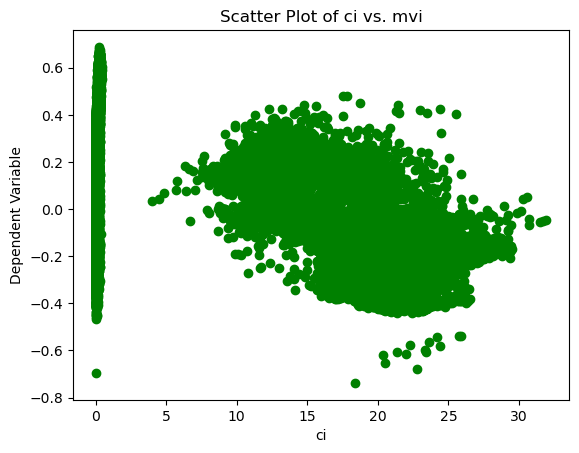

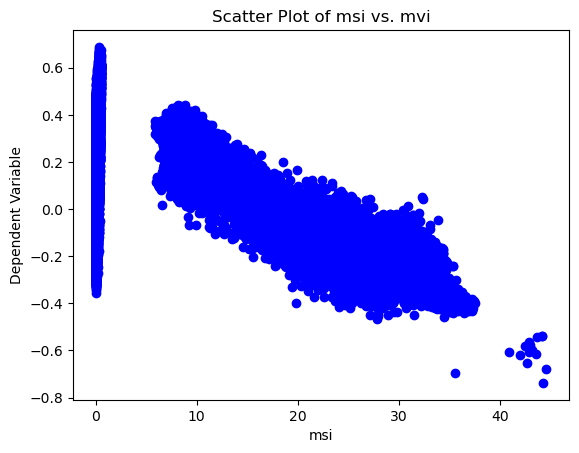

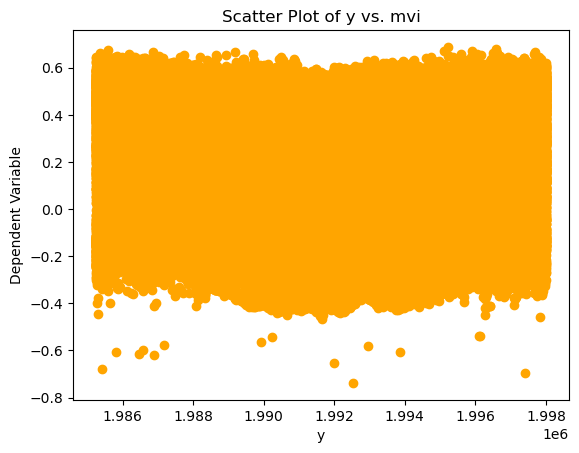

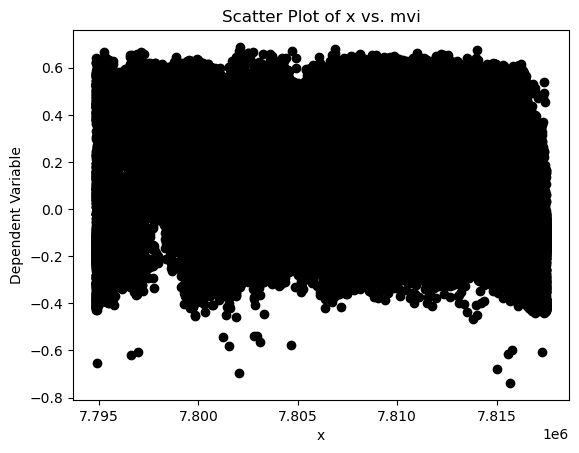

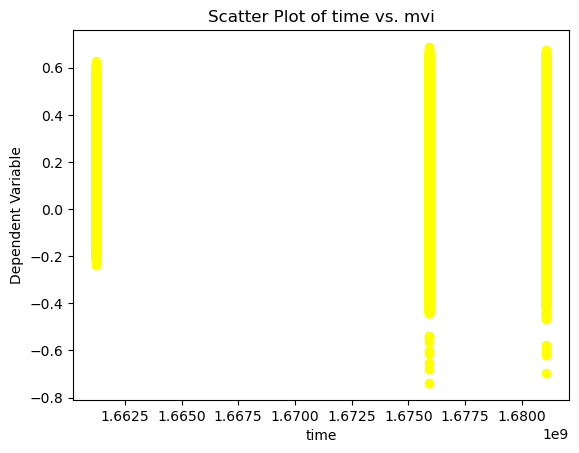

In [26]:
# Assuming X_train is a pandas DataFrame containing the independent variables
# and y_train is a pandas Series containing the dependent variable

# Define a list of colors for each independent variable
colors = ['red', 'green', 'blue', 'orange','black','yellow']

# Iterate over each independent variable and its corresponding color
for i, column in enumerate(x_test.columns):
    # Plot the scatter plot for the current independent variable with the assigned color
    plt.scatter(x_test[column], y_pred, color=colors[i])
    plt.xlabel(column)
    plt.ylabel('Dependent Variable')
    plt.title(f'Scatter Plot of {column} vs. mvi')
    plt.show()

In [27]:
df.head()

,time,y,x,spatial_ref_x,ci,spatial_ref_y,savi,spatial_ref_x.1,evi,spatial_ref_y.1,ndvi,spatial_ref_x.2,msi,spatial_ref_y.2,mvi
0,1.661212e+09,1998015.0,7794825.0,6933,0.224017,6933,0.571297,6933,2.298732,6933,0.474097,6933,0.281250,6933,0.474097
1,1.661212e+09,1998015.0,7794855.0,6933,0.232160,6933,0.597308,6933,2.690802,6933,0.490514,6933,0.291555,6933,0.490514
2,1.661212e+09,1998015.0,7794885.0,6933,0.225314,6933,0.567747,6933,2.532115,6933,0.470816,6933,0.272595,6933,0.470816
3,1.661212e+09,1998015.0,7794915.0,6933,0.230543,6933,0.587555,6933,2.547578,6933,0.484455,6933,0.289696,6933,0.484455
4,1.661212e+09,1998015.0,7794945.0,6933,0.233138,6933,0.612420,6933,2.398518,6933,0.497598,6933,0.302786,6933,0.497598


In [28]:
# Prepare the independent variable values
X_new = np.array([[0.767596,0.410628,0.435136,1998015.0,7794855.0,20210823]])  # Replace with your independent variable values

# Make predictions
y_pred = lm.predict(X_new)

print(y_pred)

[[3.18023705]]


In [29]:
# Prepare the independent variable values
X_new = np.array([[0.597308,0.232160,0.291555,1998015.0,7794855.0,20220823]])  # Replace with your independent variable values

# Make predictions
y_pred = lm.predict(X_new)

print(y_pred)

[[3.05019946]]


In [30]:
from joblib import dump

In [31]:
dump(lm, 'Linear.joblib')

['Linear.joblib']